In [12]:
# Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Import training data set

data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

In [14]:
# Feature normalization

def feature_normalize(X):
    """
    Normalizes the features in x.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Features to be normalized.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        A normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    mu : ndarray, shape (n_features,)
        The mean value.
    sigma : ndarray, shape (n_features,)
        The standard deviation.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [15]:
# Normalize X and add intercept term

X, mu, sigma = feature_normalize(X)
X = np.hstack((np.ones((m, 1)), X))

In [16]:
# Choose some alpha value

alpha = 0.15
num_iters = 400

# Init theta and run gradient descent

theta = np.zeros(3)

In [17]:
# Compute cost

def compute_cost_multi(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    theta : ndarray, shape (n_features,)
        Linear regression parameter.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m = len(y)
    diff = X.dot(theta) - y
    J = 1.0 / (2 * m) * diff.T.dot(diff)
    
    return J

In [18]:
# Gradient descent

def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    theta : ndarray, shape (n_features,)
        Initial linear regression parameter.
    alpha : float
        Learning rate.
    num_iters: int
        Number of iteration.

    Returns
    -------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    J_history: ndarray, shape (num_iters,)
        Cost history.
    """
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X))
        J_history[i] = compute_cost_multi(X, y, theta)

    return theta, J_history

In [19]:
# Run gradient descent with given parameters

theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

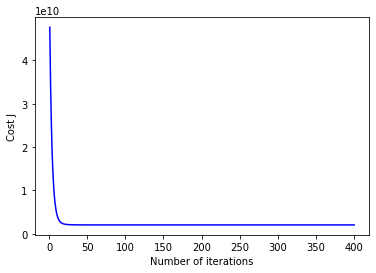

In [20]:
# Plot convergence graph

plt.figure()
plt.plot(range(1, num_iters + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [21]:
print(theta)

[340412.65957447 110631.0502787   -6649.47427067]
